In [1]:
import tensorflow as tf
import cv2 as cv
import numpy
from matplotlib import pyplot as plt
from matplotlib import cm
label =['person',
'bicycle',
'car',
'motorcycle',
'airplane',
'bus',
'train',
'truck',
'boat',
'traffic light',
'fire hydrant',
'street sign',
'stop sign',
'parking meter',
'bench',
'bird',
'cat',
'dog',
'horse',
'sheep',
'cow',
'elephant',
'bear',
'zebra',
'giraffe',
'hat',
'backpack',
'umbrella',
'shoe',
'eye glasses',
'handbag',
'tie',
'suitcase',
'frisbee',
'skis',
'snowboard',
'sports ball',
'kite',
'baseball bat',
'baseball glove',
'skateboard',
'surfboard',
'tennis racket',
'bottle',
'plate',
'wine glass',
'cup',
'fork',
'knife',
'spoon',
'bowl',
'banana',
'apple',
'sandwich',
'orange',
'broccoli',
'carrot',
'hot dog',
'pizza',
'donut',
'cake',
'chair',
'couch',
'potted plant',
'bed',
'mirror',
'dining table',
'window',
'desk',
'toilet',
'door',
'tv',
'laptop',
'mouse',
'remote',
'keyboard',
'cell phone',
'microwave',
'oven',
'toaster',
'sink',
'refrigerator',
'blender',
'book',
'clock',
'vase',
'scissors',
'teddy bear',
'hair drier',
'toothbrush',
'hair brush',]



In [2]:
points = []
def get_points(x1, y1, x2, y2):

    for x in range(x1, x2, 50):
        for y in range(y1, y2, 50):
            points.append((x, y))
                  
    return points


In [3]:
with tf.gfile.FastGFile('frozen_inference_graph.pb', 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())

with tf.Session() as sess:

    sess.graph.as_default()
    tf.import_graph_def(graph_def, name='')

    img = cv.imread('D:\\Backpack-perfect\\Backpack-perfect\\im0.png')
    rows = img.shape[0]
    cols = img.shape[1]
    inp = cv.resize(img, (300, 300))
    inp = inp[:, :, [2, 1, 0]]  

    out = sess.run([sess.graph.get_tensor_by_name('num_detections:0'),
                    sess.graph.get_tensor_by_name('detection_scores:0'),
                    sess.graph.get_tensor_by_name('detection_boxes:0'),
                    sess.graph.get_tensor_by_name('detection_classes:0')],
                   feed_dict={'image_tensor:0': inp.reshape(1, inp.shape[0], inp.shape[1], 3)})
    
    num_detections = int(out[0][0])
    
    for i in range(num_detections):
        classId = int(out[3][0][i])
        score = float(out[1][0][i])
        bbox = [float(v) for v in out[2][0][i]]
    
        if score > 0.3:
            x = bbox[1] * cols
            y = bbox[0] * rows
            right = bbox[3] * cols
            bottom = bbox[2] * rows
            cv.rectangle(img, (int(x), int(y)), (int(right), int(bottom)), (0, 0, 0), thickness=2)
            ##print((int(x), int(y)))  top left coordinate
            ##print((int(right), int(bottom))) bottom right coordinate
            print(label[classId-1])
            print(get_points(int(x), int(y), int(right), int(bottom)))

            
cv.imshow('Image', img)
cv.waitKey()

backpack
[(1177, 186), (1177, 236), (1177, 286), (1177, 336), (1177, 386), (1177, 436), (1177, 486), (1177, 536), (1177, 586), (1177, 636), (1177, 686), (1177, 736), (1177, 786), (1177, 836), (1177, 886), (1177, 936), (1177, 986), (1177, 1036), (1177, 1086), (1177, 1136), (1177, 1186), (1177, 1236), (1177, 1286), (1177, 1336), (1177, 1386), (1177, 1436), (1177, 1486), (1177, 1536), (1227, 186), (1227, 236), (1227, 286), (1227, 336), (1227, 386), (1227, 436), (1227, 486), (1227, 536), (1227, 586), (1227, 636), (1227, 686), (1227, 736), (1227, 786), (1227, 836), (1227, 886), (1227, 936), (1227, 986), (1227, 1036), (1227, 1086), (1227, 1136), (1227, 1186), (1227, 1236), (1227, 1286), (1227, 1336), (1227, 1386), (1227, 1436), (1227, 1486), (1227, 1536), (1277, 186), (1277, 236), (1277, 286), (1277, 336), (1277, 386), (1277, 436), (1277, 486), (1277, 536), (1277, 586), (1277, 636), (1277, 686), (1277, 736), (1277, 786), (1277, 836), (1277, 886), (1277, 936), (1277, 986), (1277, 1036), (1277

-1

[(1177, 186), (1177, 236), (1177, 286), (1177, 336), (1177, 386), (1177, 436), (1177, 486), (1177, 536), (1177, 586), (1177, 636), (1177, 686), (1177, 736), (1177, 786), (1177, 836), (1177, 886), (1177, 936), (1177, 986), (1177, 1036), (1177, 1086), (1177, 1136), (1177, 1186), (1177, 1236), (1177, 1286), (1177, 1336), (1177, 1386), (1177, 1436), (1177, 1486), (1177, 1536), (1227, 186), (1227, 236), (1227, 286), (1227, 336), (1227, 386), (1227, 436), (1227, 486), (1227, 536), (1227, 586), (1227, 636), (1227, 686), (1227, 736), (1227, 786), (1227, 836), (1227, 886), (1227, 936), (1227, 986), (1227, 1036), (1227, 1086), (1227, 1136), (1227, 1186), (1227, 1236), (1227, 1286), (1227, 1336), (1227, 1386), (1227, 1436), (1227, 1486), (1227, 1536), (1277, 186), (1277, 236), (1277, 286), (1277, 336), (1277, 386), (1277, 436), (1277, 486), (1277, 536), (1277, 586), (1277, 636), (1277, 686), (1277, 736), (1277, 786), (1277, 836), (1277, 886), (1277, 936), (1277, 986), (1277, 1036), (1277, 1086), 

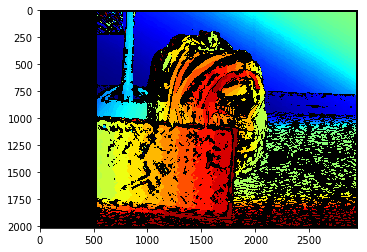

In [4]:
final_depth = []
left  = cv.imread("D:\\Backpack-perfect\\Backpack-perfect\\im0.png", cv.IMREAD_GRAYSCALE)
right = cv.imread("D:\\Backpack-perfect\\Backpack-perfect\\im1.png", cv.IMREAD_GRAYSCALE)

fx = 479.489        # lense focal length
baseline = 171.548  # distance in mm between the two cameras
disparities = 512 # num of disparities to consider
block = 31        # block size to match
units = 0.512     # depth units, adjusted for the output to fit in one byte

sbm = cv.StereoBM_create(numDisparities=disparities,
                          blockSize=block)

# disparities
disparity = sbm.compute(left, right)
valid_pixels = disparity > 0


depth = numpy.zeros(shape=left.shape).astype("uint8")
depth[valid_pixels] = (fx * baseline) / (units * disparity[valid_pixels])
print(points)
for (x,y) in points:

    if((x<valid_pixels.shape[0]) and (y<valid_pixels.shape[1]) and (valid_pixels[x][y])):
        print(depth[x][y])
        final_depth.append(depth[x][y])
    


depth = cv.equalizeHist(depth)
colorized_depth = numpy.zeros((left.shape[0], left.shape[1], 3), dtype="uint8")
temp = cv.applyColorMap(depth, cv.COLORMAP_JET)
#print(temp)
colorized_depth[valid_pixels] = temp[valid_pixels]
cv.imwrite("p.jpg",colorized_depth)
plt.imshow(colorized_depth)
plt.show()

In [5]:
print(final_depth)

[59, 58, 58, 57, 57, 56, 56, 55, 54, 54, 54, 53, 52, 52, 59, 58, 58, 57, 57, 56, 56, 55, 55, 54, 54, 54, 53, 53, 52, 52, 59, 58, 58, 57, 56, 56, 55, 55, 55, 54, 54, 53, 53, 53, 52, 52, 59, 58, 58, 57, 57, 56, 56, 56, 55, 55, 54, 54, 53, 53, 53, 52, 59, 58, 58, 57, 57, 56, 56, 55, 55, 55, 55, 54, 54, 54, 53, 53, 53, 52, 59, 58, 57, 57, 56, 56, 55, 54, 54, 53, 53, 53, 52, 59, 58, 58, 57, 57, 57, 56, 56, 56, 55, 54, 54, 53, 53, 52, 52, 52, 59, 58, 58, 58, 57, 57, 56, 56, 56, 55, 55, 54, 54, 53, 53, 53, 52, 52, 52, 59, 58, 58, 57, 57, 56, 56, 55, 54, 54, 54, 53, 53, 53, 52, 52, 59, 58, 58, 58, 57, 56, 56, 55, 55, 54, 54, 53, 53, 53, 52, 52, 52, 59, 58, 58, 58, 57, 57, 56, 56, 56, 55, 54, 54, 54, 54, 53, 53, 52, 52, 52, 58, 58, 58, 58, 57, 57, 56, 56, 56, 56, 55, 55, 54, 54, 54, 53, 53, 53, 52, 52, 52, 54, 56, 56, 56, 55, 56, 55, 55, 55, 54, 54, 54, 53, 52, 52, 52, 54, 53, 53, 52, 52, 54, 52, 53, 53, 52, 52, 52, 52, 51, 52, 51, 51, 51, 51, 49, 49, 51, 49, 50, 49, 49, 49, 48, 48, 48, 47, 47,

In [6]:
(unique, counts) = numpy.unique(final_depth, return_counts=True)
frequencies = numpy.asarray((unique, counts)).T

print(frequencies)

[[47  3]
 [48  3]
 [49  6]
 [50  1]
 [51  6]
 [52 37]
 [53 36]
 [54 37]
 [55 26]
 [56 34]
 [57 23]
 [58 28]
 [59 11]]
